<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Generative_Adversarial_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative Adversarial Nets**

논문 링크: https://arxiv.org/abs/1406.2661

데이터셋: MNIST (1 x 28 x 28)

당시에는 확률론적인 계산에 근사(intractable probabilistic computations)하는 데에 어려움이 있었고, ReLU와 같은 piecewise linear unit에 장점을 최대화하기에도 어려움이 있던 상황이었다. 그래서 제안된 방법이 바로 **GAN**이다.

Generative Adversarial Nets, 일명 GAN은 이름에서 알 수 있듯이 적대적 생성 모델이다. 이 모델은 "실제로 있을 법한 가짜"를 만든다.

## **How to do make a fake real?**

그러면 어떻게 진짜같은 가짜를 만들 수 있을까?

이는 수학적으로 실제 데이터 분포와 비슷한 분포에서 나온 데이터를 실제와 비슷하다고 말 할 수 있다.

즉, **이미지 데이터는 다차원 특정 공간의 한 점으로 표현된다**.

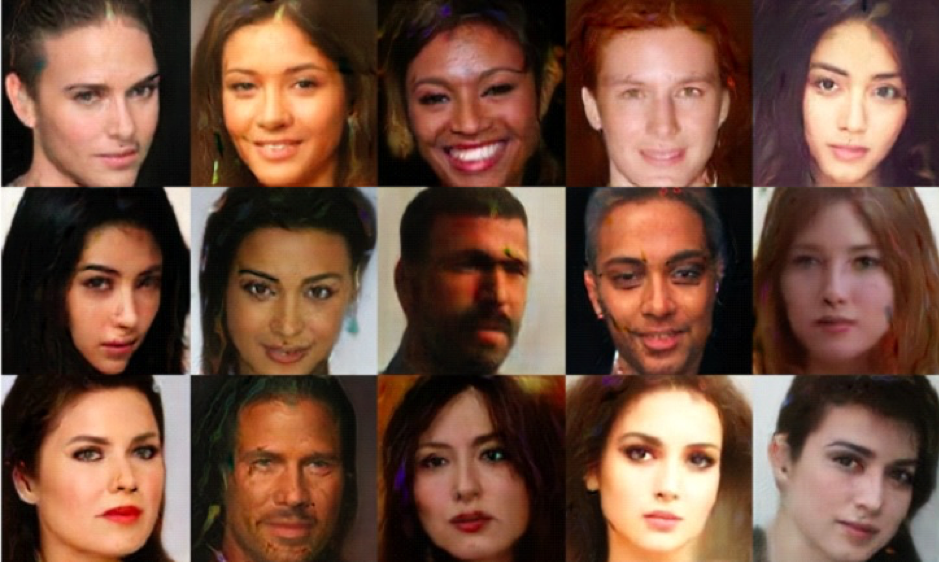

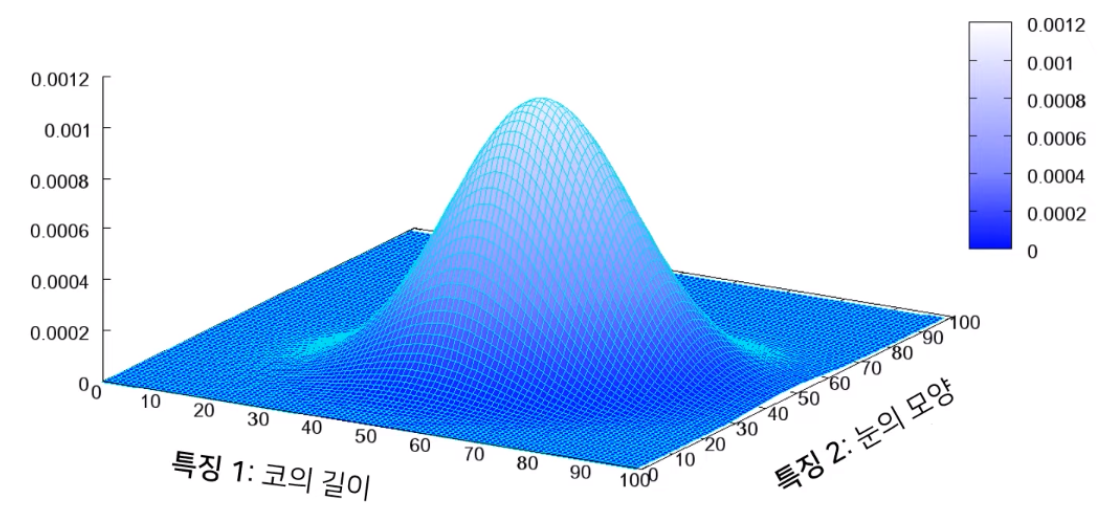

위의 사진은 이미지의 다양한 특징들이 각각의 확률 변수가 되어 **다변수 확률분포(multivariate probability distribution)**된는 것을 사람의 얼굴로 예시를 들은 것이다. 이처럼 눈의 위치, 코의 위치, 입의 위치와 이미지의 특징을 가진 위치가 각각 특정 분포에 근사되어 있다는 뜻이다. 다시 말해 **사람의 얼굴에는 통계적인 평균치가 존재한다는 것**이다.

그러면 실제 인공지능이 어떤 방법을 통해 만들 수 있는 걸까?

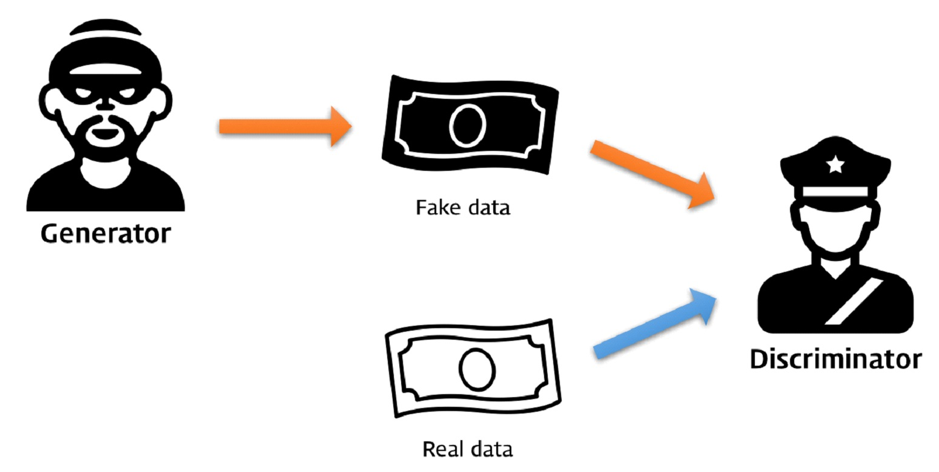

위의 그림은 GAN을 설명할 때 자주 볼 수 있는 그림이다.

그림을 통해 알 수 있듯이 생성자는 판별자를 속일 수 있게 가짜 data를 진짜 data처럼 만드는 역할을 하고 판별자는 생성자로부터 받은 이미지를 가짜로 구별하고, 진짜 data는 진짜라고 구별을 하는 역할을 담당한다.

이렇게 생성자와 판별자, 두 모델이 서로 학습을 하여 결과적으로 생성자가 만드는 data를 더 이상 판별자가 구별하지 못하는 단계까지 오게 되는 것이 바로 GAN의 원리이다.

다시 말해, **이미지 데이터의 분포를 근사하는 모델 G(generator)를 만드는 것이 GAN의 목표**이다.

자세한 수식과 코드는 뒤의 GAN 구조 부분에 넣어뒀다.

## **GAN 구조**

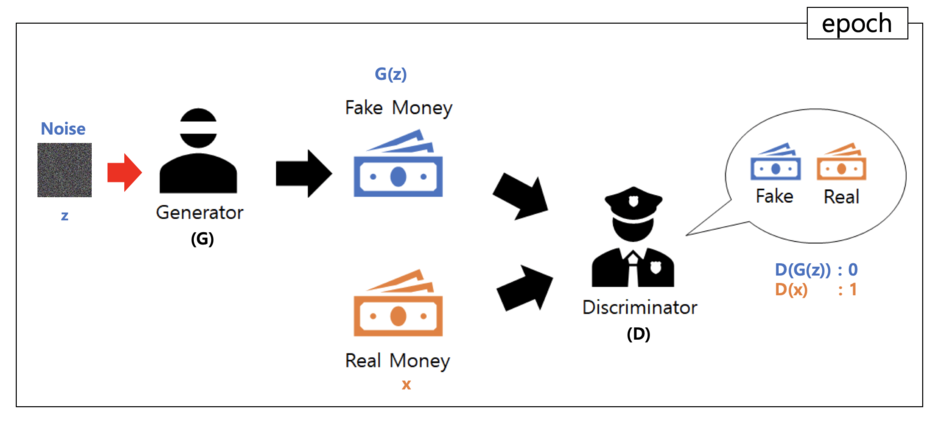

아까 위의 GAN 설명 이미지를 좀더 구체적으로 표현한 것이다.
1. 제일 처음 0과 1로 인해 마구 뿌려진 Noise가 있다. 이를 z로 표현한다.
2. G(Generator)는 위조 지폐를 만든다. G가 Z로 만들었으니 이를 G(z)라 한다.
3. D(Discriminator)는 위조 지폐와 실제 지폐를 구분해야 한다. 만일 위조 지폐라면 0을 출력하고, 진짜 지폐라면 1을 출력하기로 한다. 즉, 위조 지폐인 D(G(z))는 0을 출력하고 실제 지폐인 D(x)는 1을 출력하게 된다. 
4. 이 과정이 한 번의 Epoch가 된다.

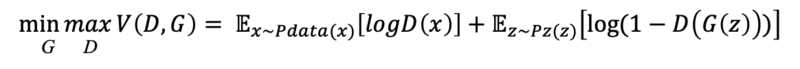

V(D,G)는 GAN의 Loss Function이다. 그럼 이 수식을 각각 D와 G의 입장에서 살펴보겠다.

### **D의 입장**

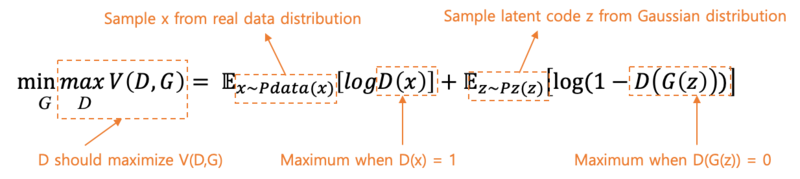

D는 가짜 데이터는 0를 출력하고 진짜 데이터는 1를 출력해야 한다. 여기서 X는 진짜 데이터이므로 1을 출력해야하고 G(z)는 가짜 데이터이므로 0을 출력해야 한다.

**D의 목적은 V(D, G)가 최대가 되도록 하는 것을 의미한다.** 

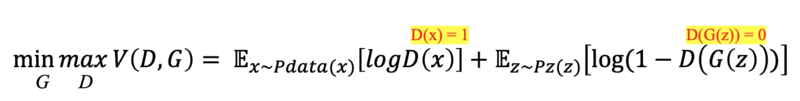

즉, 위의 이미지와 같은 결과가 나와야 한다. 


하지만, log(1)의 값은 0인데 이게 왜 최대일까? 이는 log(x)에서 x의 값이 0~1이기 때문에 log(1)의 값이 최대가 된 것이다.

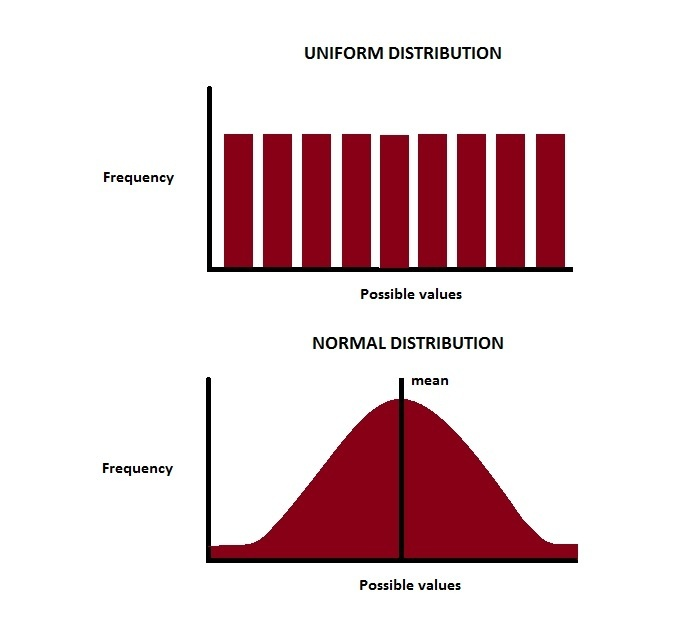

또한 G(z)에서 z의 값은 랜덤으로 뿌려진 벡터라고 하는데, 주로 두 가지 분포에 따른 랜덤 값을 가진다. 

바로  위 그림처럼 Gaussian Distribution 또는 Uniform Distribution 을 따른다.

그렇기 때문에 D(G(z))의 값이 0이 되어 log(1 - 0)꼴이 되어야 한다.

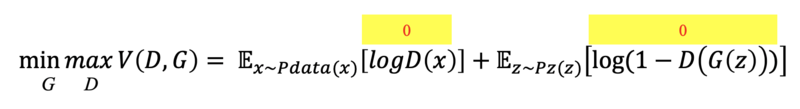

위 식이 앞서 말한 내용을 최종적으로 풀어 D의 입장을 정리한 것이다. 결국 **D가 원하는 최적의 상황은 전부 0이 되는 것**이다.

따라서 D는 0에 가까운 숫자로 가기 위해 노력하는 것을  최대(max)가 되려 한다 하고, 이를 max D로 표현한 것이다.

### **G의 입장**

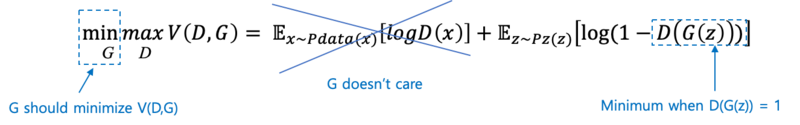

G는 D가 G가 만든 데이터에 대해 1를 출력하게 해야 한다. D가 진짜 데이터를 얼마나 잘 구분하는지는 상관없다. 여기서 x는 진짜 데이터고 G(z)가 G가 만든 가짜 데이터이므로 D(G(z))가 1를 출력하게 해야 한다.

**G의 목적은 V(D, G)가 최소가 되도록 하는 것을 의미한다.** 

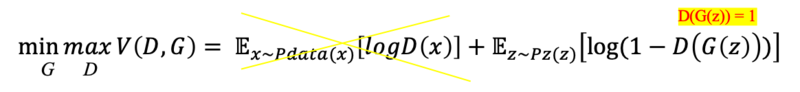

즉, 위와 같은 결과가 나와야한다. log(1-1)은 -infinity이기 때문에 G가 원하는 결과가 나온다.

따라서 G는 매우 매우 작은 음의 무한대가 되는 방향이 되는 것을 최소(max)가 되려 한다 하고, 이를 min G로 표현한 것이다.

### **Train**

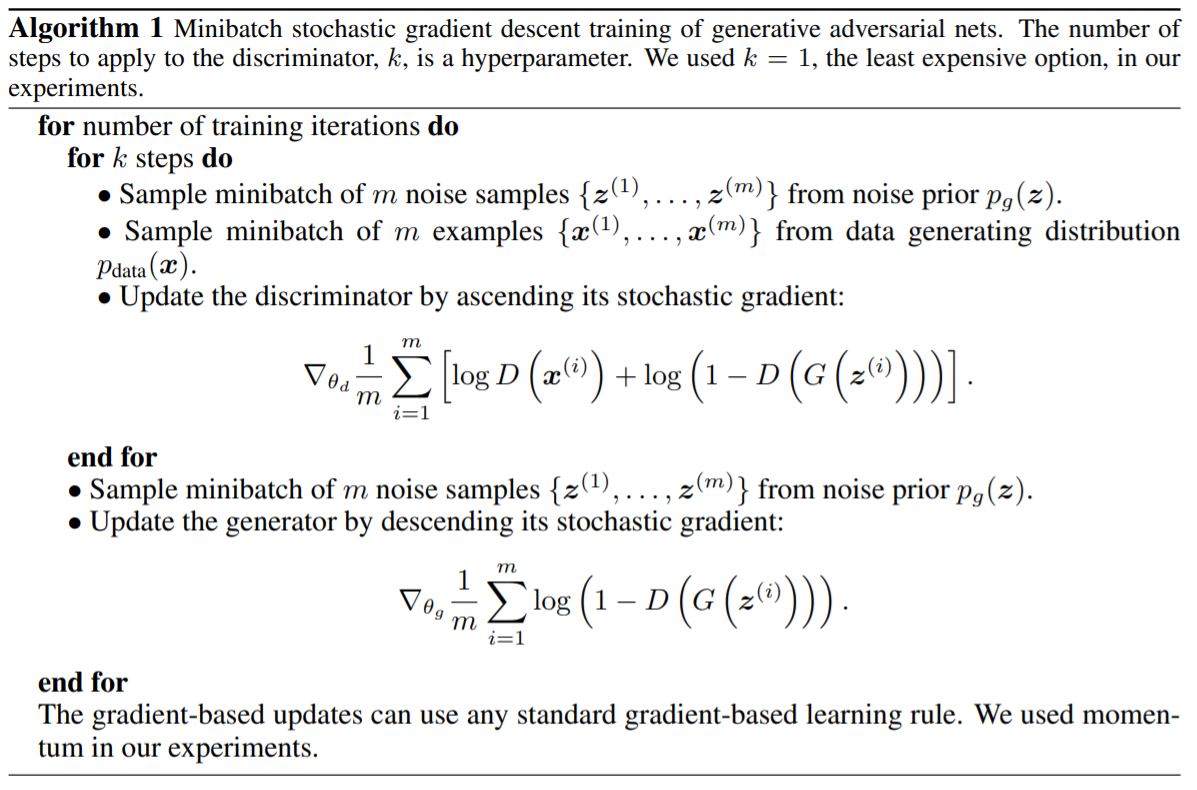

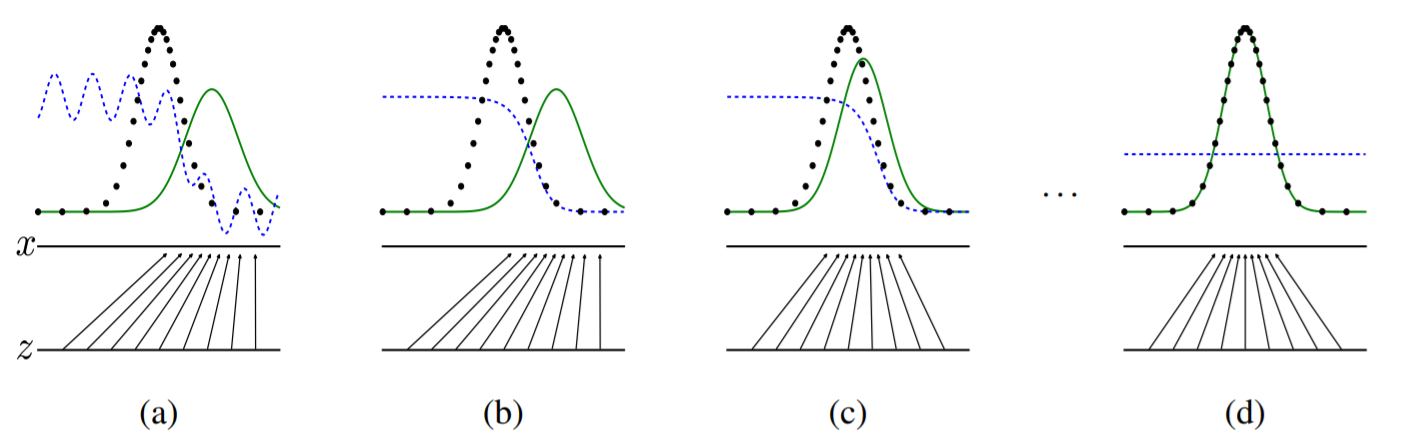

시간이 지나면서 위의 사진과 같이 모델 G가 원본 데이터의 분포를 학습한다. (실제 학습은 보다 더 고차원적이지만, 이해를 돕기 위해 본 논문에서는 이렇게 표현했다)

### **Pytorch**

In [1]:
import torch
import torch.nn as nn

from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image

import numpy as np
from IPython.display import Image

In [2]:
# dimensionality of the latent space
latent_dim = 100

In [3]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()

    def block(in_channels, out_channels, normalize=True):
      layers = [nn.Linear(in_channels, out_channels)]
      
      if normalize:
        layers.append(nn.BatchNorm1d(out_channels, 0.8))
      
      layers.append(nn.LeakyReLU(0.2, inplace=True))

      return layers

    self.model = nn.Sequential(
        *block(latent_dim, 128, normalize=False),
        *block(128, 256),
        *block(256, 512),
        *block(512, 1024),
        nn.Linear(1024, 1 * 28 * 28),
        nn.Tanh()
    )

  def forward(self, z):
    img = self.model(z)
    img = img.view(img.size(0), 1, 28, 28)
    return img

G(Generator, 생성자)에 충분한 수의 매개 변수를 확보하기 위해, 이 구현에서는 선형 레이어(Linear Layer)를 쌓아서 생성자를 만들었다.

마지막에는 출력을 MNIST 이미지의 크기로 맞추기 위해 레이어 크기를 28x28로 줄였고, 각 레이어마다 활성 함수로는 LeakyReLU를 이용했다. 또한, 생성자의 마지막 레이어에서는 출력값을 픽셀값의 범위인 -1과 1 사이로 만들어주기 위해 Tanh를 사용했다.

In [4]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()

    self.model = nn.Sequential(
        nn.Linear(1 * 28 * 28, 512),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(512, 256),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Linear(256, 1),
        nn.Sigmoid(),
    )

  def forward(self, img):
    flattened = img.view(img.size(0), -1)
    output = self.model(flattened)

    return output

D(Dscriminator, 구분자)는 이미지를 입력으로 받고 그 이미지가 진짜일 확률을 0과 1 사이의 숫자 하나로 출력하는 함수다. 구분자의 구현은 생성자와 마찬가지로 선형 레이어(Linear Layer)를 쌓아서 구분자를 만들었다.

레이어마다 활성 함수로 LeakyReLU를 이용했고, 마지막 레이어에서는 출력값을 0과 1 사이로 만들기 위해 활성 함수로 Sigmoid를 넣었다.

In [5]:
transform = transforms.Compose([transforms.Resize(28), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

batch_size = 128
dataset_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=4)

num_data_train = len(dataset_train)

num_batch_train = np.ceil(num_data_train / batch_size)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
generator = Generator()
discriminator = Discriminator()

generator.cuda()
discriminator.cuda()

adversarial_loss = nn.BCELoss()
adversarial_loss.cuda()

lr = 0.0002

optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

In [7]:
num_epoch = 200

for epoch in range(num_epoch):
  for batch, (imgs, _) in enumerate(loader_train):

    real = torch.cuda.FloatTensor(imgs.size(0), 1).fill_(1.0)
    fake = torch.cuda.FloatTensor(imgs.size(0), 1).fill_(0.0)

    real_imgs = imgs.cuda()

    optimizer_G.zero_grad()

    z = torch.normal(mean=0, std=1, size=(imgs.shape[0], latent_dim)).cuda()

    generated_imgs = generator(z)

    g_loss = adversarial_loss(discriminator(generated_imgs), real)

    g_loss.backward()
    optimizer_G.step()

    optimizer_D.zero_grad()

    real_loss = adversarial_loss(discriminator(real_imgs), real)
    fake_loss = adversarial_loss(discriminator(generated_imgs.detach()), fake)
    d_loss = (real_loss + fake_loss) / 2

    d_loss.backward()
    optimizer_D.step()

    done = epoch * len(loader_train) + batch
    if done % 100 == 0:
      save_image(generated_imgs.data[:25], f"{done}.png", nrow=5, normalize=True)

    print("TRAIN: EPOCH %04d / %04d | BATCH %04d / %04d | D LOSS %.4f | G LOSS %.4f" %
          (epoch, num_epoch, batch, num_batch_train, d_loss.item(), g_loss.item()))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
TRAIN: EPOCH 0189 / 0200 | BATCH 0159 / 0469 | D LOSS 0.1959 | G LOSS 2.1105
TRAIN: EPOCH 0189 / 0200 | BATCH 0160 / 0469 | D LOSS 0.1454 | G LOSS 2.8121
TRAIN: EPOCH 0189 / 0200 | BATCH 0161 / 0469 | D LOSS 0.1868 | G LOSS 2.7830
TRAIN: EPOCH 0189 / 0200 | BATCH 0162 / 0469 | D LOSS 0.2180 | G LOSS 2.2395
TRAIN: EPOCH 0189 / 0200 | BATCH 0163 / 0469 | D LOSS 0.2171 | G LOSS 1.9528
TRAIN: EPOCH 0189 / 0200 | BATCH 0164 / 0469 | D LOSS 0.1942 | G LOSS 2.7714
TRAIN: EPOCH 0189 / 0200 | BATCH 0165 / 0469 | D LOSS 0.2007 | G LOSS 2.4459
TRAIN: EPOCH 0189 / 0200 | BATCH 0166 / 0469 | D LOSS 0.2824 | G LOSS 2.3976
TRAIN: EPOCH 0189 / 0200 | BATCH 0167 / 0469 | D LOSS 0.2333 | G LOSS 1.6668
TRAIN: EPOCH 0189 / 0200 | BATCH 0168 / 0469 | D LOSS 0.2154 | G LOSS 2.9455
TRAIN: EPOCH 0189 / 0200 | BATCH 0169 / 0469 | D LOSS 0.2410 | G LOSS 2.5679
TRAIN: EPOCH 0189 / 0200 | BATCH 0170 / 0469 | D LOSS 0.2253 | G LOSS 2.2998
TRAIN: EPOCH 0189 / 0200 | BATCH 0171 / 

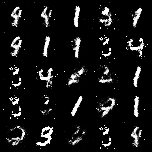

In [8]:
Image('39000.png')

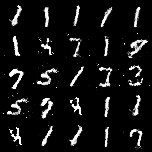

In [9]:
Image('93000.png')